In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
import glob
import scipy.io as sio
import keras
from sklearn.utils import resample
from scipy.sparse import coo_matrix
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout, Activation
from keras.optimizers import SGD
from keras.initializers import random_uniform
from sklearn.model_selection import train_test_split
#from keras.layers.convolutional import Conv1D
from keras.models import Sequential
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

#path='C:\\Users\\Samiran\\Downloads\\Dataset\\dataset_emwise\\'
X=np.load('Eval.npy')
y=np.load('Clas_Lab.npy')
y=y.astype('int')
nClass=6
X=np.transpose(X)

FileNotFoundError: [Errno 2] No such file or directory: 'Eval.npy'

In [ ]:
X.shape

(100, 2730)

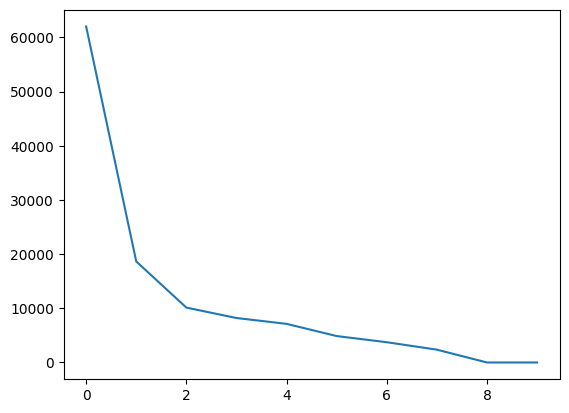

In [ ]:
plt.plot(X[45,0:10])

In [ ]:
y.shape

(2884,)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
import glob
import scipy.io as sio
import keras
from sklearn.utils import resample
from scipy.sparse import coo_matrix
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout, Activation
from keras.optimizers import SGD
from keras.initializers import random_uniform
from sklearn.model_selection import train_test_split
#from keras.layers.convolutional import Conv1D
from keras.models import Sequential
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
#X0=sio.loadmat('Eval3.mat')

In [ ]:
# Define the 1D CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv1D(32, kernel_size=3, activation='tanh', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(32, kernel_size=3, activation='tanh', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(48, kernel_size=3, activation='tanh', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(48, kernel_size=3, activation='tanh'),
        layers.MaxPooling1D(pool_size=2),
        # layers.Conv1D(32, kernel_size=3, activation='tanh'),
        # layers.MaxPooling1D(pool_size=2),
        # layers.Conv1D(16, kernel_size=3, activation='tanh'),
        # layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation='tanh'),
        layers.Dropout(0.25),
        layers.Dense(32, activation='tanh'),
        layers.Dropout(0.25),
        # layers.Dense(32, activation='tanh'),
        # layers.Dropout(0.25),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create the CNN model
sequence_length=X.shape[1]
num_classes=6
input_shape = (sequence_length, 1)
model = create_cnn_model(input_shape, num_classes)

model.summary()

# Compile the model
model.compile(optimizer='Adam', loss='crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
pred=model.predict(X_test)
pred = np.argmax(pred,axis=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 98, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 47, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 23, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 21, 48)              │           4,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 10, 48)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 8, 48)               │           6,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 4, 48)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,478 (115.15 KB)

 Trainable params: 29,478 (115.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6355 - loss: 0.9537 - val_accuracy: 0.8634 - val_loss: 0.3912
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8476 - loss: 0.4386 - val_accuracy: 0.8424 - val_loss: 0.3510
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8462 - loss: 0.4312 - val_accuracy: 0.8771 - val_loss: 0.3125
Epoch 4/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8460 - loss: 0.4075 - val_accuracy: 0.8739 - val_loss: 0.3125
Epoch 5/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8466 - loss: 0.3674 - val_accuracy: 0.8761 - val_loss: 0.3076
Epoch 6/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8208 - loss: 0.3931 - val_accuracy: 0.8729 - val_loss: 0.3310
Epoch 7/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8588 - loss: 0.3730 - val_accuracy: 0.8729 - val_loss: 0.3030
Epoch 8/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8686 - loss: 0.3343 - val_ac

In [ ]:
import pickle
pickle.dump(model, open('CNN_nEm_Est', 'wb'))

In [ ]:
#Compute Classwise Precision Recall, f1, Accuracy
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

NameError: name 'confusion_matrix' is not defined

In [ ]:
from sklearn.metrics import precision_score, f1_score, recall_score, classification_report
f1=f1_score(y_test,pred, average='macro')
prec=precision_score(y_test,pred,average='macro')
rec=recall_score(y_test,pred,average='macro')
target_names = ['nEm3', 'nEm4', 'nEm5', 'nEm6', 'nEm8','nEm9']
print(classification_report(y_test,pred, target_names=target_names,digits=4))
print(f1,prec,rec)

              precision    recall  f1-score   support

        nEm3     0.8626    0.9741    0.9150       116
        nEm4     0.9894    0.9398    0.9640       299
        nEm5     0.8895    0.9441    0.9160       179
        nEm6     0.9057    0.8205    0.8610       117
        nEm8     0.9000    0.9844    0.9403        64
        nEm9     0.9942    0.9605    0.9770       177

    accuracy                         0.9370       952
   macro avg     0.9236    0.9372    0.9289       952
weighted avg     0.9398    0.9370    0.9372       952

0.9288741470978311 0.9235530246530468 0.9372351897107337


In [ ]:
accuracy = [
0.6355,0.8476,0.8462,0.8460,0.8466,0.8208,0.8588,0.8686,0.8680,0.8813,
0.8713,0.8733,0.8921,0.8680,0.8812,0.8724,0.8797,0.8792,0.8717,0.8862,
0.8905,0.8883,0.9060,0.9029,0.9043,0.9050,0.9206,0.9073,0.8985,0.9074,
0.9052,0.9121,0.9077,0.9252,0.9230,0.9152,0.9234,0.9171,0.9179,0.9177,
0.9157,0.9412,0.9412,0.9298,0.9049,0.9336,0.9286,0.9439,0.9268,0.9403,
0.9345,0.9287,0.9303,0.9350,0.9281,0.9356,0.9276,0.9358,0.9248,0.9354,
0.9208,0.9365,0.9306,0.9334,0.9302,0.9356,0.9231,0.9389,0.9296,0.9271,
0.9319,0.9345,0.9309,0.9197,0.9364,0.9277,0.9268,0.9259,0.9429,0.9300,
0.9324,0.9481,0.9370,0.9337,0.9247,0.9322,0.9399,0.9344,0.9350,0.9400,
0.9420,0.9306,0.9333,0.9485,0.9286,0.9339,0.9342,0.9418,0.9297,0.9337
]

loss = [
0.9537,0.4386,0.4312,0.4075,0.3674,0.3931,0.3730,0.3343,0.3581,0.3423,
0.3209,0.3325,0.3114,0.3337,0.3361,0.3159,0.3431,0.3276,0.3230,0.3125,
0.2888,0.2999,0.2586,0.2618,0.2594,0.2750,0.2315,0.2495,0.2881,0.2525,
0.2677,0.2679,0.2416,0.2153,0.2195,0.2378,0.2039,0.2131,0.2283,0.2131,
0.2216,0.1936,0.1774,0.1908,0.2571,0.1764,0.1975,0.1656,0.1894,0.1646,
0.1903,0.1817,0.1923,0.1862,0.1962,0.1848,0.2048,0.1736,0.1972,0.1793,
0.2125,0.1881,0.1896,0.1920,0.2076,0.1812,0.2197,0.1795,0.1942,0.2025,
0.1824,0.1742,0.1782,0.2022,0.1813,0.2110,0.1929,0.2231,0.1729,0.1802,
0.1919,0.1456,0.1793,0.1855,0.1917,0.1977,0.1699,0.1929,0.1876,0.1769,
0.1493,0.1871,0.1907,0.1507,0.1893,0.1872,0.1986,0.1738,0.2008,0.1815
]

val_accuracy = [
0.8634,0.8424,0.8771,0.8739,0.8761,0.8729,0.8729,0.8782,0.8887,0.8582,
0.8887,0.8950,0.8887,0.8992,0.8939,0.8960,0.8918,0.8950,0.8803,0.8950,
0.8939,0.9076,0.9118,0.9139,0.9128,0.9107,0.9076,0.9086,0.9118,0.9055,
0.9181,0.9128,0.9202,0.9181,0.9118,0.9202,0.9160,0.9170,0.9202,0.9202,
0.9244,0.9149,0.9286,0.9275,0.9275,0.9307,0.9307,0.9254,0.9307,0.9359,
0.9328,0.9349,0.9349,0.9286,0.9338,0.9286,0.9338,0.9296,0.9286,0.9275,
0.9359,0.9328,0.9349,0.9328,0.9349,0.9338,0.9349,0.9317,0.9286,0.9328,
0.9359,0.9296,0.9275,0.9265,0.9391,0.9380,0.9328,0.9359,0.9338,0.9349,
0.9317,0.9370,0.9359,0.9265,0.9286,0.9380,0.9401,0.9370,0.9391,0.9338,
0.9380,0.9359,0.9380,0.9433,0.9443,0.9422,0.9328,0.9380,0.9212,0.9349
]

val_loss = [
0.3912,0.3510,0.3125,0.3125,0.3076,0.3310,0.3030,0.2862,0.2828,0.3429,
0.2740,0.2803,0.2935,0.2861,0.2778,0.2792,0.2702,0.2677,0.2874,0.2770,
0.2545,0.2515,0.2398,0.2354,0.2494,0.2443,0.2494,0.2368,0.2308,0.2589,
0.2301,0.2231,0.2339,0.2337,0.2348,0.2426,0.2309,0.2260,0.2228,0.2197,
0.2045,0.2183,0.1998,0.2237,0.2100,0.1877,0.1863,0.2076,0.1858,0.1853,
0.1929,0.1882,0.1804,0.1949,0.2069,0.1980,0.1879,0.2141,0.1898,0.2054,
0.1829,0.1794,0.1920,0.1919,0.1881,0.2073,0.1765,0.1992,0.2028,0.1998,
0.1852,0.1938,0.2081,0.2416,0.1701,0.1774,0.1765,0.1786,0.1869,0.1865,
0.1881,0.1770,0.1764,0.2074,0.2114,0.1826,0.1778,0.1741,0.1777,0.1753,
0.1832,0.1780,0.1787,0.1731,0.1654,0.1571,0.1773,0.1867,0.2029,0.1776
]


In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 101)

plt.figure(figsize=(16,5), dpi=200)

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(epochs, accuracy, linewidth=3.5, color='blue', label='Train Accuracy')
plt.plot(epochs, val_accuracy, linewidth=3.5, color='red', label='Test Accuracy')
plt.xlabel("Epoch", fontsize=16,fontweight='bold')
plt.ylabel("Accuracy", fontsize=16,fontweight='bold')
plt.title("Epoch vs Accuracy", fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.grid(False)

# Loss plot
plt.subplot(1,2,2)
plt.plot(epochs, loss, linewidth=3.5, color='blue', label='Train Loss')
plt.plot(epochs, val_loss, linewidth=3.5, color='red', label='Test Loss')
plt.xlabel("Epoch", fontsize=16,fontweight='bold')
plt.ylabel("Loss", fontsize=16,fontweight='bold')
plt.title("Epoch vs Loss", fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.grid(False)

plt.tight_layout()
plt.show()

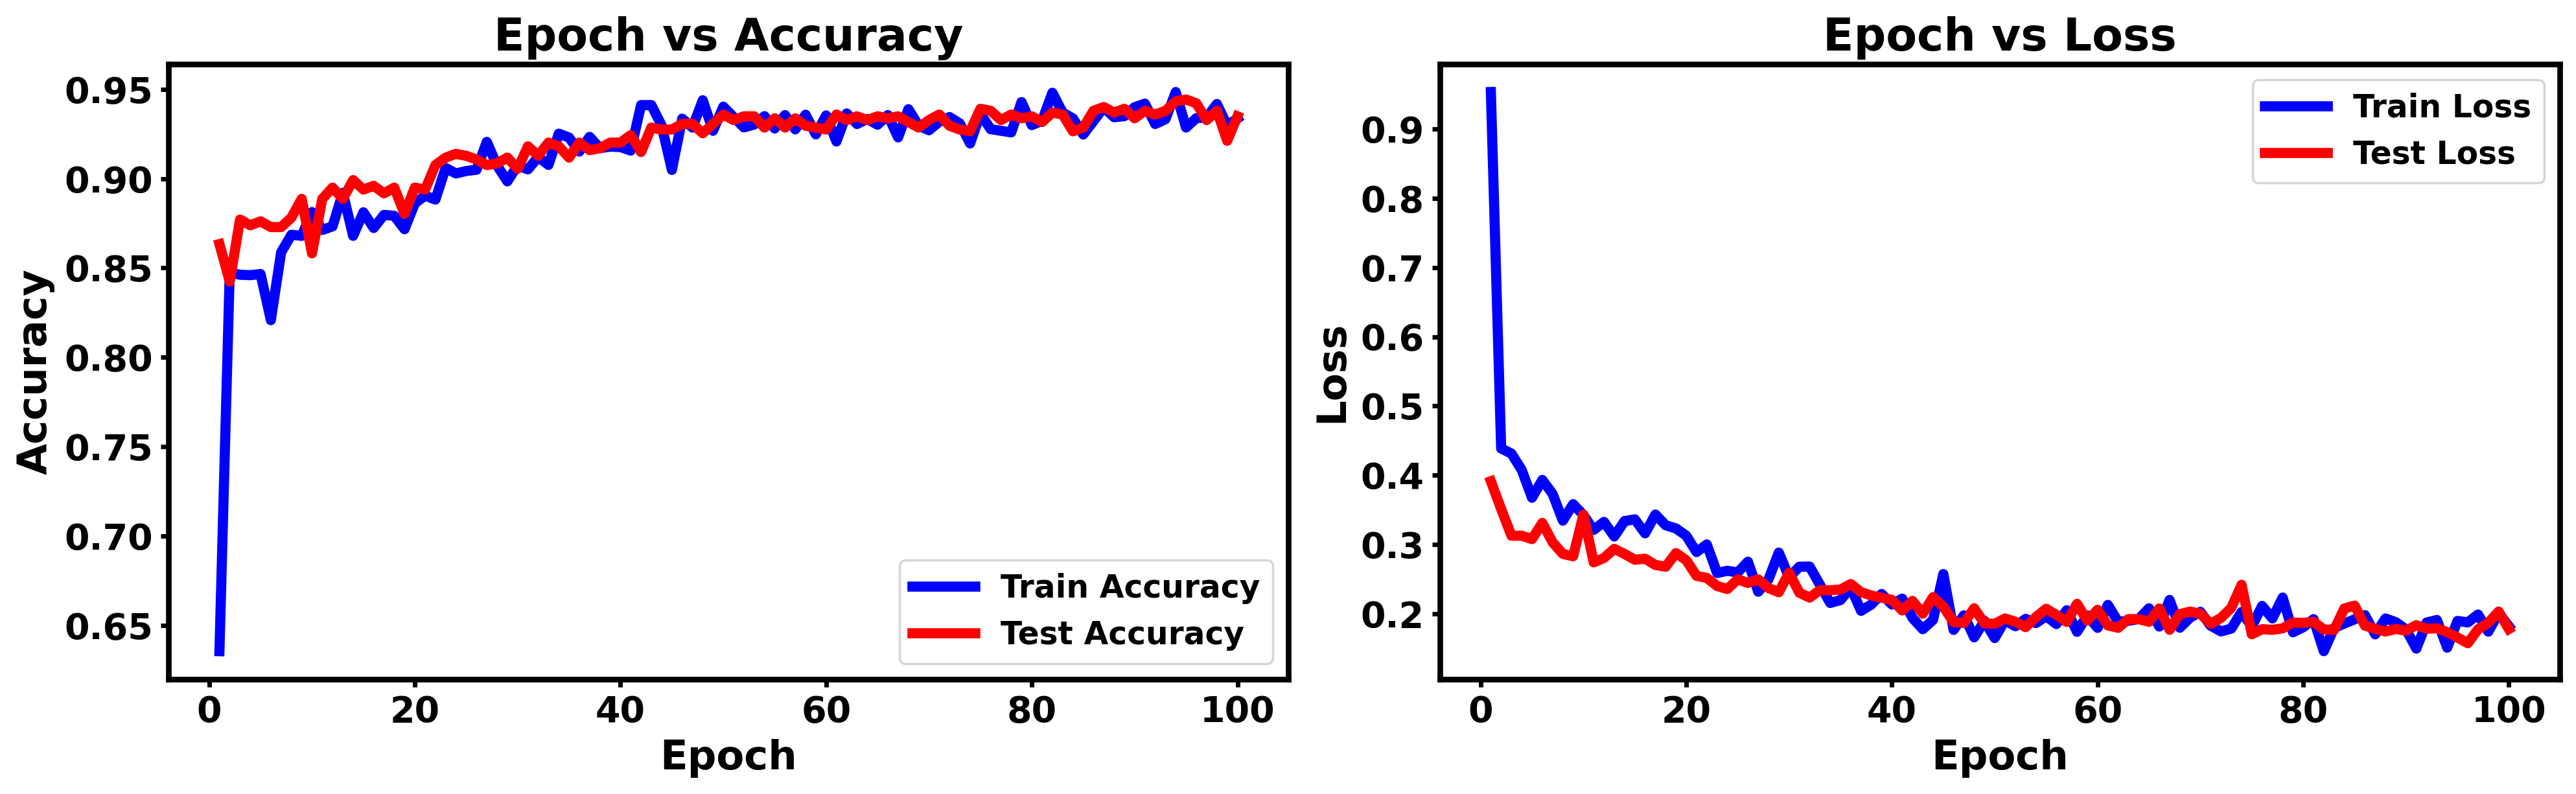

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 101)

plt.figure(figsize=(16,5), dpi=250)

# ===============================
#     GLOBAL BOLD STYLE
# ===============================
plt.rcParams['axes.linewidth'] = 2.5        # Bold axes
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.major.width'] = 2       # Thick ticks
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

# ===============================
# ACCURACY PLOT
# ===============================
plt.subplot(1,2,1)
plt.plot(epochs, accuracy, linewidth=4.5, color='blue', label='Train Accuracy')
plt.plot(epochs, val_accuracy, linewidth=4.5, color='red', label='Test Accuracy')

plt.xlabel("Epoch", fontsize=18, fontweight='bold')
plt.ylabel("Accuracy", fontsize=18, fontweight='bold')
plt.title("Epoch vs Accuracy", fontsize=20, fontweight='bold')

plt.legend(fontsize=14)
plt.grid(False)

# Make axis ticks bold
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')


# ===============================
# LOSS PLOT
# ===============================
plt.subplot(1,2,2)
plt.plot(epochs, loss, linewidth=4.5, color='blue', label='Train Loss')
plt.plot(epochs, val_loss, linewidth=4.5, color='red', label='Test Loss')

plt.xlabel("Epoch", fontsize=18, fontweight='bold')
plt.ylabel("Loss", fontsize=18, fontweight='bold')
plt.title("Epoch vs Loss", fontsize=20, fontweight='bold')

plt.legend(fontsize=14)
plt.grid(False)

plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')


# ===============================
# LAYOUT
# ===============================
plt.tight_layout()
plt.show()
